# Active Py-ART Development - Submitting a Pull Request (PR)

The motivation for this blog comes from wanting to change the colorscheme within the default Py-ART documentation images to a more ([color vision deficiency friendly color scheme](https://ntrs.nasa.gov/api/citations/20180004634/downloads/20180004634.pdf)).

Here are the images we are working with:

<img src="../images/PyART_Docs_Original_PPI_image.png" alt="drawing" width="400"/>

<img src="../images/PyART_Docs_OriginalRHI_withJetColorscheme.png" alt="drawing" width="400"/>

This is also a good time to illustrate how to get started with
active development in Py-ART and submitting changes
to the source code for further collaboration. 

Please refer to the ([Py-ART Contributor's Guide](https://arm-doe.github.io/pyart/userguide/INSTALL.html)) for installation guidence. 

I've highlighted some steps of the installation below that tripped me up and might offer some assistance. 

### First, if you have not done so already, you will need to fork the Py-ART github repository

by clicking here:

<img src="../images/pyart_github_clone.png" alt="drawing" width="400"/>

### Second, in a terminal, you will need to clone your remote fork with the "git clone" command

In [ ]:
git clone https_link_to_your_fork

If you are unfamiliar with git command line commands, please review this ([getting started documentation](https://foundations.projectpythia.org/foundations/getting-started-github.html))

### Third, create the "pyart-docs" conda environment 

We will use the documentation YML file (located at the /pyart/doc/environmental.yml) to create the "pyart-docs" conda environment. 

NOTE: The documentation YML file is slightly different from the /pyart/environmental.yml file and contains the packages needed for active development

To create a new environment from this YML file, type: 

In [ ]:
conda env create -f environment.yml

### Fourth, we will need to install the ([TRMM RSL Library](https://trmm-fc.gsfc.nasa.gov/trmm_gv/software/rsl/))

<img src="../images/TRMM_RSL_webpage.png" alt="drawing" width="400"/>

Click on the "Download latest version" button and download the package to a local location (~/opt - for me)

You will then need to run the installation commands from the RSL library:

In [ ]:
 ./configure

In [ ]:
 make install 

You will need to add the location of the library to your path. For me, this would be the ~/.kshrc file

In [ ]:
export PATH="/opt/rsl-v1.50/:$PATH"

### Lastly, activate the 'pyart-docs' environment and install the python script within your forked repository

In [ ]:
 pip install -e .

## OKAY! You should be installed now, and ready to make changes to the source code!

##### 1. First, create a New Branch for our Changes

In [ ]:
git checkout -b newblog_post

##### 2. Push New Branch To Remote

In [ ]:
git push --set-upstream origin newblog_post

Let's first change the PPI image. The original code is located at: /pyart/examples/plotting/plot_ppi_mdv.py

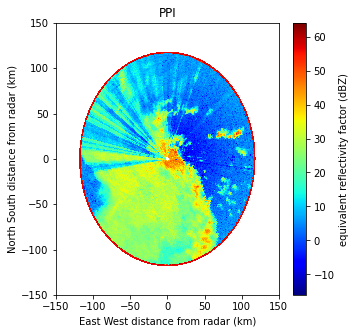

In [5]:
"""
=================================
Create a PPI plot from a MDV file
=================================
   
An example which creates a PPI plot of a MDV file using a RadarDisplay object.
   
"""
# Author: Jonathan J. Helmus (jhelmus@anl.gov)
# License: BSD 3 clause

import matplotlib.pyplot as plt
import pyart
from pyart.testing import get_test_data

filename = get_test_data("110635.mdv")

# create the plot using RadarDisplay
radar = pyart.io.read_mdv(filename)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111)
display.plot(
    "reflectivity", 0, vmin=-16.0, vmax=64, title="PPI", cmap=plt.get_cmap("jet")
)
display.set_limits(ylim=[-150, 150], xlim=[-150, 150])

Let's now change the color scheme to one of Py-ART's ([colorbind friendly schemes](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html?highlight=homeyerrainbow))

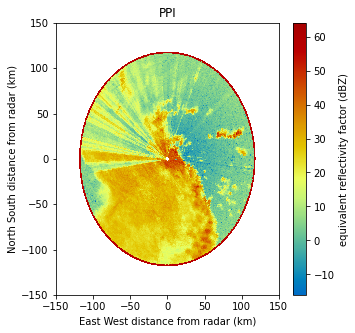

In [2]:
"""
=================================
Create a PPI plot from a MDV file
=================================
   
An example which creates a PPI plot of a MDV file using a RadarDisplay object.
   
"""
# Author: Jonathan J. Helmus (jhelmus@anl.gov)
# License: BSD 3 clause

import matplotlib.pyplot as plt
import pyart
from pyart.testing import get_test_data

filename = get_test_data("110635.mdv")

# create the plot using RadarDisplay
radar = pyart.io.read_mdv(filename)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111)
display.plot(
    "reflectivity", 0, vmin=-16.0, vmax=64, title="PPI", cmap="pyart_HomeyerRainbow"
)
display.set_limits(ylim=[-150, 150], xlim=[-150, 150])

For the RHI scan, I've created a new file to only display one of the sweeps, called "plot_rhi_cfradial_singlescan.py"

This new file is also located at: /pyart/examples/plotting/

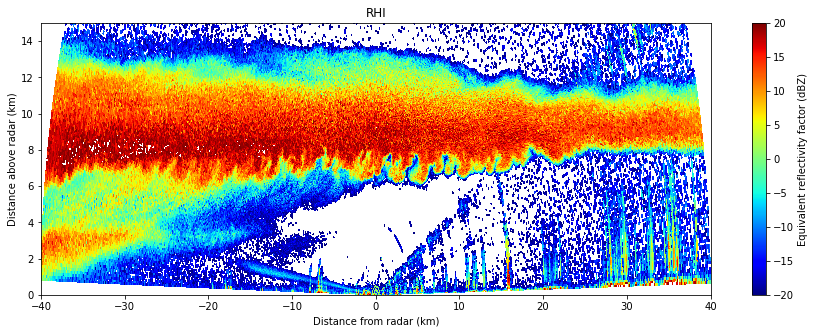

In [3]:
"""
======================================================
Create a multiple panel RHI plot from a CF/Radial file
======================================================
 
An example which creates a RHI plot of a CF/Radial file using
a RadarDisplay object.
 
"""

import matplotlib.pyplot as plt
import netCDF4
import pyart
from pyart.testing import get_test_data

filename = get_test_data("sgpxsaprrhicmacI5.c0.20110524.015604_NC4.nc")

# create the plot using RadarDisplay
radar = pyart.io.read_cfradial(filename)
display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=[15, 5])
fig.subplots_adjust(hspace=0.4)
xlabel = "Distance from radar (km)"
ylabel = "Distance above radar (km)"
colorbar_label = "Equivalent reflectivity factor (dBZ)"

ax = fig.add_subplot(1, 1, 1)
display.plot(
    "reflectivity_horizontal",
    0,
    vmin=-20,
    vmax=20,
    mask_outside=True,
    title="RHI",
    axislabels=(xlabel, ylabel),
    cmap=plt.get_cmap("jet"),
    colorbar_label=colorbar_label,
    ax=ax,
)
display.set_limits(ylim=[0, 15], ax=ax)

plt.show()

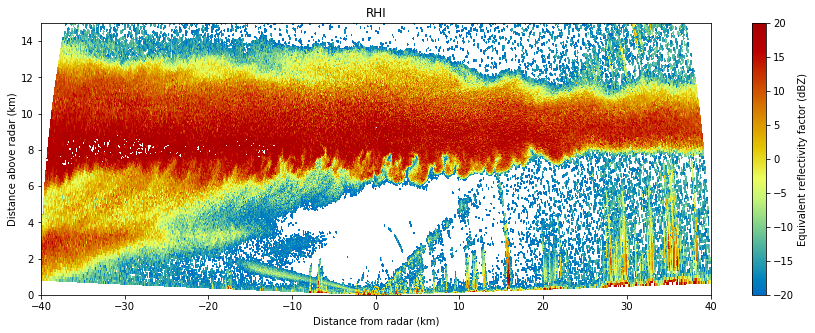

In [4]:
"""
======================================================
Create a multiple panel RHI plot from a CF/Radial file
======================================================
 
An example which creates a RHI plot of a CF/Radial file using
a RadarDisplay object.
 
"""

import matplotlib.pyplot as plt
import netCDF4
import pyart
from pyart.testing import get_test_data

filename = get_test_data("sgpxsaprrhicmacI5.c0.20110524.015604_NC4.nc")

# create the plot using RadarDisplay
radar = pyart.io.read_cfradial(filename)
display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=[15, 5])
fig.subplots_adjust(hspace=0.4)
xlabel = "Distance from radar (km)"
ylabel = "Distance above radar (km)"
colorbar_label = "Equivalent reflectivity factor (dBZ)"

ax = fig.add_subplot(1, 1, 1)
display.plot(
    "reflectivity_horizontal",
    0,
    vmin=-20,
    vmax=20,
    mask_outside=True,
    title="RHI",
    axislabels=(xlabel, ylabel),
    cmap="pyart_HomeyerRainbow",
    colorbar_label=colorbar_label,
    ax=ax,
)
display.set_limits(ylim=[0, 15], ax=ax)

plt.show()

## Now lets commit these changes to github!

The git 'status' command will show which branch we are working on and all changes made

'Changes not staged for commit" are all changes I have made to files within my local Py-ART repository.

'Untracked files' are any file that is new to Py-ART, and is currently not submitted to the repository. 

In [ ]:
# (pyart-docs) git status
On branch blog_PR
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../../doc/source/_static/ppi.png
	modified:   ../../doc/source/_static/rhi.png
	modified:   plot_ppi_mdv.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	plot_rhi_cfradial_singlescan.py

no changes added to commit (use "git add" and/or "git commit -a")

As the git 'status' output shows, we need to 'git add' to update any features that changed. 
After adding the new images for the docs and updated (and new) code, we need to "git commit" these changes.

PyART requires a commit statement when submitting a pull request, which I have added above the comment lines, marked by '#'

In [ ]:
(pyart-docs) git commit 
hint: Waiting for your editor to close the file... 
   ENH: PyART doc static image color schemes changed to colorblind friendly PyART scheme.
   plot_ppi_mdv.py modified for this change. 
   plot_rhi_cfradial_singlescan.py created to create one rhi cfradial plot for the docs.
   # Please enter the commit message for your changes. Lines starting
   # with '#' will be ignored, and an empty message aborts the commit.
   #
   # On branch blog_PR
   # Changes to be committed:
   #       modified:   ../../doc/source/_static/ppi.png
   #       modified:   ../../doc/source/_static/rhi.png
   #       modified:   plot_ppi_mdv.py
   #       new file:   plot_rhi_cfradial_singlescan.py
 


Finally, 'git push' will push all these changes to the remote repository (my personal fork of Py-ART), where I can then request a pull-request by going to my 'branches' 

## After Creating a Pull Request, this is what it looks like on GitHub

<img src="../images/pull_request_commitmessage.png" alt="drawing" width="400"/>

Additionally, the Pull Request will show what code has been changed and allows anyone to respond with comments/suggestions

<img src="../images/pull_request_changes.png" alt="drawing" width="400"/>

# Hope this helped!